# MD_1 RMSF Plotting with mdtraj and Pandas DataFrame 

In [28]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd

In [29]:
residue_selection = "not (resid 622 or resid 623 or resid 624 or resid 933 or resid 934 or resid 935 or resid 1244 or resid 1245 or resid 1246 or resid 0 or resid 1 or resid 2 or resid 311 or resid 312 or resid 313)"

In [30]:
location = '/media/scottzhuang/data/MD/4NPQ_PH7_md1/'

In [41]:
def rmsf_dataframe(traj_name, rep):
    if (rep == "1"):
        traj_location = location + traj_name + '/4NPQ_' + traj_name + '_md.skip10.ca.xtc' 
        top_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro' 
        ref_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro'
        traj = md.load(traj_location,top=top_location)
        ref = md.load(ref_location)
        topology = traj.topology
        if traj.n_atoms != ref.n_atoms:
            traj = traj.atom_slice(topology.select(residue_selection))
        traj.superpose(ref)
        avg_xyz = np.mean(traj.xyz[:, :, :], axis=0)
        rmsf = np.sqrt(3*np.mean((traj.xyz[:, :, :] - avg_xyz)**2, axis=(0,2)))
        rmsd_data = pd.DataFrame({'RMSF':rmsf,'residue':list(range(0,traj.n_atoms))})
        return rmsd_data
    if (rep == "2"):
        location = '/media/scottzhuang/data/MD/4NPQ_PH7_md2/'
        traj_location = location + traj_name + '/4NPQ_' + traj_name + '_md2.skip10.ca.xtc' 
        top_location = location + traj_name + '/4NPQ_' + traj_name + '_md2.ca.gro' 
        ref_location = location + traj_name + '/4NPQ_' + traj_name + '_md2.ca.gro'
        traj = md.load(traj_location,top=top_location)
        ref = md.load(ref_location)
        topology = traj.topology
        if traj.n_atoms != ref.n_atoms:
            traj = traj.atom_slice(topology.select(residue_selection))
        traj.superpose(ref)
        avg_xyz = np.mean(traj.xyz[:, :, :], axis=0)
        rmsf = np.sqrt(3*np.mean((traj.xyz[:, :, :] - avg_xyz)**2, axis=(0,2)))
        rmsd_data = pd.DataFrame({'RMSF':rmsf,'residue':list(range(0,traj.n_atoms))})        
        return rmsd_data

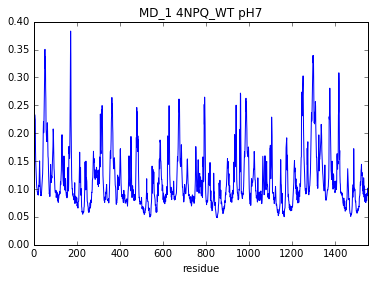

In [36]:
rmsf_4NPQ_BA1_md1 = rmsf_dataframe("BA1","1")
rmsf_4NPQ_BA1_md1.plot(x='residue', y='RMSF',legend=False,title="MD_1 4NPQ_WT pH7")

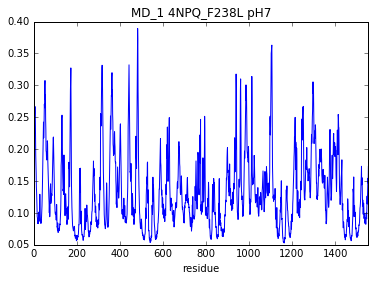

In [37]:
rmsf_4NPQ_BA1_F238L_md1 = rmsf_dataframe("BA1_F238L","1")
rmsf_4NPQ_BA1_F238L_md1.plot(x='residue', y='RMSF',legend=False,title="MD_1 4NPQ_F238L pH7")

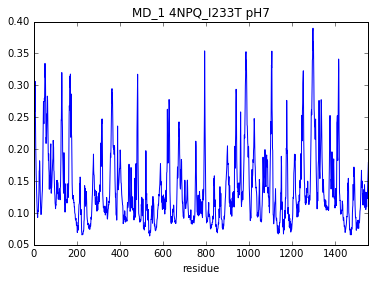

In [38]:
rmsf_4NPQ_BA1_I233T_md1 = rmsf_dataframe("BA1_I233T","1")
rmsf_4NPQ_BA1_I233T_md1.plot(x='residue', y='RMSF',legend=False,title="MD_1 4NPQ_I233T pH7")

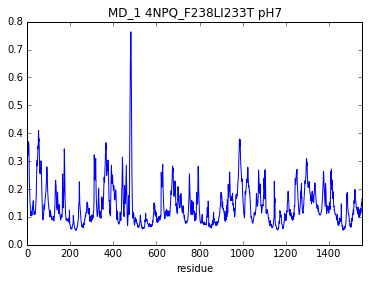

In [39]:
rmsf_4NPQ_BA1_F238LI233T_md1 = rmsf_dataframe("BA1_F238LI233T","1")
rmsf_4NPQ_BA1_F238LI233T_md1.plot(x='residue', y='RMSF',legend=False,title="MD_1 4NPQ_F238LI233T pH7")

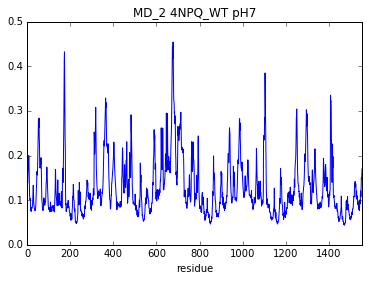

In [42]:
rmsf_4NPQ_BA1_md2 = rmsf_dataframe("BA1","2")
rmsf_4NPQ_BA1_md2.plot(x='residue', y='RMSF',legend=False,title="MD_2 4NPQ_WT pH7")

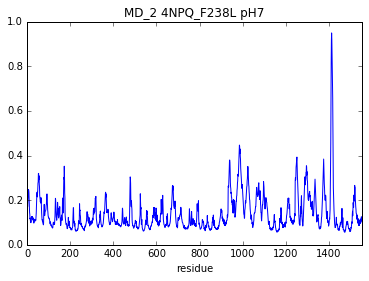

In [43]:
rmsf_4NPQ_BA1_F238L_md2 = rmsf_dataframe("BA1_F238L","2")
rmsf_4NPQ_BA1_F238L_md2.plot(x='residue', y='RMSF',legend=False,title="MD_2 4NPQ_F238L pH7")

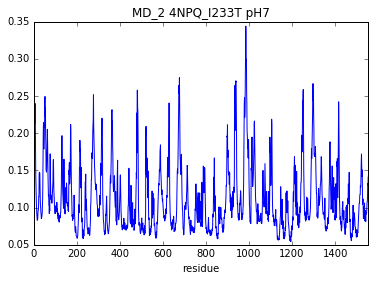

In [44]:
rmsf_4NPQ_BA1_I233T_md2 = rmsf_dataframe("BA1_I233T","2")
rmsf_4NPQ_BA1_I233T_md2.plot(x='residue', y='RMSF',legend=False,title="MD_2 4NPQ_I233T pH7")

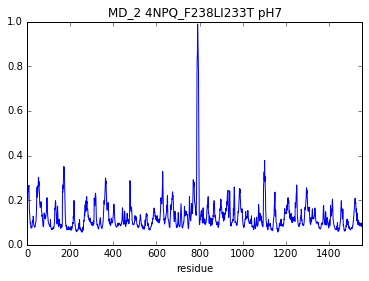

In [45]:
rmsf_4NPQ_BA1_F238LI233T_md2 = rmsf_dataframe("BA1_F238LI233T","2")
rmsf_4NPQ_BA1_F238LI233T_md2.plot(x='residue', y='RMSF',legend=False,title="MD_2 4NPQ_F238LI233T pH7")